Zombie Apocolypse Simulation!

In [ ]:
"""
USER:!! 
make sure you have the ODEsolver.py document saved in the same file as this code
Welcome to the Zombie Apocolypse Population Simulation! 
Add your own values for the initial conditions and the duration of each phase to the code between lines 101 to 136

"""

100%|######################################################| 10599/10599 [00:00<00:00, 103942.38it/s]


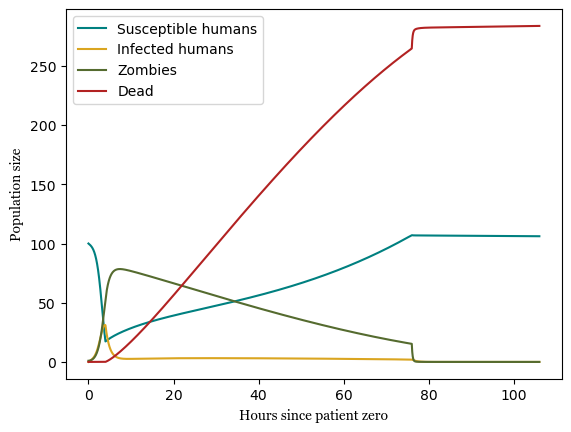

In [77]:
import numpy as np 
from matplotlib import pyplot as plt
from ODEsolver import ForwardEuler
# lets make the zombie class

class SIZR: # define a constructor that contains susceptible human population growth rate, zombie infecting human rate (beta),             
    def __init__(   #, roh (is infected people becoming zombies), (alpha) and the initial conditions
        self, sigma, beta, rho, delta_S, delta_I, alpha, S0, I0, Z0, R0
    ):       
        """
        S: Number of susceptible humans.
        I: Number of infected humans.
        Z: Number of zombies.
        R: Number of removed individuals
        """
    #want parameters to be able to vary in time want to make these values callable so we can evaluate them at a certain point in time
        if isinstance (sigma, (float, int)): # if sigma is a number in float or integer form do the following
    #lambda is a magical fxn in the form "lambda arguments: expression" that is an anonymous function that always returns sigma
            self.sigma = lambda t: sigma # if sigma is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(sigma):   # If sigma is already a function (callable),
            self.sigma = sigma  #it is used as-is to calculate the value at any given time 

   #Do the same for all parameters within the code, ie all the stuff the user will implement:
        
        if isinstance (beta, (float, int)): # if beta is a number i float or integer form do the following
            self.beta = lambda t: beta # if beta is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(beta):   # If beta is already a function (callable),
            self.beta = beta   #it is used as-is to calculate the value at any given time

        if isinstance (rho, (float, int)): # if rho is a number in float or integer form do the following
            self.rho = lambda t: rho # if rho is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(rho):   # If rho is already a function (callable),
            self.rho = rho  #it is used as-is to calculate the value at any given time 
        
        if isinstance (delta_S, (float, int)): # if delta_S is a number in float or integer form do the following
            self.delta_S = lambda t: delta_S # if delta_S is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(delta_S):     # If delta_S is already a function (callable),
            self.delta_S = delta_S  #it is used as-is to calculate the value at any given time 

        if isinstance (delta_I, (float, int)): # if delta_I is a number in float or integer form do the following
            self.delta_I = lambda t: delta_I # if delta_I is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(delta_I):   # If delta_I is already a function (callable),
            self.delta_I = delta_I  #it is used as-is to calculate the value at any given time 

        if isinstance (alpha, (float, int)): # if alpha is a number in float or integer form do the following
            self.alpha = lambda t: alpha # if alpha is just a number convert it into a function so it is evaluated consistently, but it still just returns one value
        elif callable(alpha):   # If alphais already a function (callable),
            self.alpha = alpha  #it is used as-is to calculate the value at any given time 
        
        # now store initial conditions given by problem when this class is applied  
        self.initial_conditions = [S0, I0, Z0, R0] 

 #now we make the SIZR class callable, so we can use it as if it were a function!
    #use to find a specified solution(u) and time point(t)
   
    def __call__(self, u, t): #RHS of the system of ODEs, when this class is called with thease arguments this method is invoked
     # state that all the values come from u 
        S, I, Z, _ = u # u is a vector made up of S, I, Z, R at a time point t
     
        """
        now we tell the computer to return the solutions of the rate of change (the derivative) of S, I, Z, R 
        so we tell it how to equate the derivatives given the equations

        S' = sigma - beta*S*Z - delta_S*S
        I' = beta*S*Z - rho*I - delta_I*I
        Z' = rho*I - alpha*S*Z
        R' = delta_S*S + delta_I*I + alpha*S*Z

        """  
        return np.array([
        #put t in brackets to make each parameter time-dependent so we can call the value at any point 
            self.sigma(t) - self.beta(t)*S*Z - self.delta_S(t)*S,
            self.beta(t)*S*Z - self.rho(t)*I - self.delta_I(t)*I,
            self.rho(t)*I - self.alpha(t)*S*Z,   # change in number of zombies
            self.delta_S(t)*S + self.delta_I(t)*I +self.alpha(t)*S*Z, 
         # R isnt used
        ])

# The ClASS IS DONE! From here on out, we can now define the value of the element in our problem and
# use the class to solve the problem we define

if __name__ == "__main__": #It ensures that certain parts of the code are executed only when the problem is run within the same script as the class is defined, and not when it's imported as a module

    """
    If you want to have fun, make the parameter vary with time

Phase 1: Initial spread 
    Lasts 'phase1 ' hours (recomemend like four).P atient zero breaks out, and zombies multiply rapidly.
   
    
Phase 2: Hysteria
    Lasts 'phase2- phase1' hours. The zombie threat is evident. People freak out and run away, avoiding zombies.

Phase 3: Counter-attack
    Lasts 'phase3 - phase2' hours. Humans congriegte and orgianiz to fight zombies. Humans know how to kill them at this point and how to avoid being bitten
    humans also kill the infected systematicaly to prevent growth in zombies
    """

    #replace the light green numbers (from lines 102 to 110) with your own number values
    # phases are described above in red
    phase1 =  4           # Select how many hours you would like to run phase1 (Intial spread) 
    phase2 = 72 + phase1  # Select how many hours phase2 (Histaria) lasts. 
    phase3 = 30 + phase2  # Select how long phase3 (the counter-attack) lasts.
    
    #Now define the initial conditions 
    
    S0 = 100 # Initial number of people
    I0 = 0   # Initial number of infected
    Z0 = 1  # initial number of zombies (if one it's patient zero)
    R0 = 0  # Initial number of removed (dead) individuals, due to this disease

    #Now choose your zombie universe by defining the probabilities during the different phases, check comments below if loops to get an idea of their relations 
    
    #probability zombie infects a human- zombie human interactions
    b1 = 0.03  #infection rate during initial phase
    b2 = 0.0012  #infection rate during hysteria 
    b3 = 0.0006  #infection rate during the counterattacks

    # probability of Zombie deaths via humans 
    a1 = 0.00001 #zombie death rate during the initial transmission
    a2 = 0.0016  #zombie death rate during hysteria 
    a3 = 0.05    #zombie death rate during the counterattacks

    # human pop. growth rate per time step
    s1 = 0   #human pop growth rate during the initial transmission    
    s2 = 4   #human pop growth rate during the hysteria
    s3 = 0.03 #human pop growth rate during the counterattacks
    
    #probability infected humans get killed by other humans 
    di1 = 0    # inital phase
    di2 = 0.0014  #hysteria phase
    di3 = 0.05    # counteratack phase

    #probability of humans dying without being infected by a zombie
    ds1 = 0.00001  #during the initial phase and hysterical phase 
    ds2 = 0.0005   #counteratack phase
    
    
    #probability zombie infects a human- zombie human interactions
    def beta(t): 
        if t < phase1:
            return b1         # Phase 1: In the initial phase, no one knows what is going on, people don't know to avoid zombies, thus more interactions
        elif phase1 <= t < phase2:
            return b2       # Phase 2: Hysteria; people know to run away, fewer interactions, but no organization and panic still lead to deaths
        else:
            return b3        # Phase 3: Counter-attack (people still get infected while fighting zombies but know how to avoid better)
   
    # probability of Zombie deaths via humans        
    def alpha(t):
        if t < phase1:
            return a1  # Phase 1: very few nerds immediately know to kill zombies and can successfully do so
        elif phase1 <= t < phase2:
            return a2  # Phase 2: Humans occasionally kill zombies
        else:
            return a3 # Phase 3: Humans actively kill zombies
            
    #human pop. growth rate
    def sigma(t):
        if t < phase1:
            return s1  # Phase 1: low human population growth as people are running away
        elif phase1 <= t < phase2:
            return s2 # Phase 2: increased growth during hysteria as people band together for survival
        else:
            return s3  # Phase 3: very slow population growth, stragglers might join 
   
    #infected people who become zombies
    def rho(t):
        return 0.9999 # Almost all that are infected become zombies, there is a very very small chance you don't turn, (maybe you cut off your arm)

    #infected humans get killed by other humans    
    def delta_I(t):
        if t < phase1:
            return di1      # Phase 1: very few deaths of infected humans everyone is too busy freaking out
        elif phase1 <= t < phase2:
            return di2 # Phase 2: Some infected humans are killed
        else:
            return di3   # Phase 3: Infected humans systematically eradicated by alive humans
        
   #probability of humans dying without being infected by a zombie
    def delta_S(t):
        if t < phase2:
            return ds1# Phase 1 & 2: lower death rate from rioting and panic among susceptible humans
        else:
            return ds2    # Phase 3: Susceptible humans die due to harsh conditions
    """
    If you want a simpler model, define the parameters as constants as seen below:
 
        beta = 0.012
    probability of a human killing a zombie
        alpha = 0.0016
    population growth per period of time
        sigma = 2
    infected people who become zombies
        rho = 1
    infected humans get killed by other humans
        delta_I = 0.014 
    probability zombies killing humans
        delta_S =0
    """

# now we define our Zombie model!
    zombie_model = SIZR(# Creates an instance of the SIZR class using the parameters and initial conditions you define above
        sigma, beta, rho, delta_S, delta_I, alpha, S0, I0, Z0, R0
    )
# Now we put it all together! within the solver, we apply the forward Euler method to the zombie_model   
    solver = ForwardEuler ( zombie_model ) 
    # solver.set_initial_conditions is part of the Forward_Euler class and must be given values so we give it the initial condition we defined after being passed through the zombie model
    solver.set_initial_conditions( zombie_model.initial_conditions)
    
    # time steps in hours ( start val, stop val, time steps) * resolution testing was completed to ensure the codes
    time_steps = np.linspace(0, phase3, phase3*100)
    u, t = solver.solve(time_steps)

    Gfont = {'fontname':'Georgia'}

    plt.plot(t, u[:, 0], label="Susceptible humans",color='teal')
    plt.plot(t, u[:, 1], label="Infected humans", color='goldenrod')
    plt.plot(t, u[:, 2], label="Zombies", color='darkolivegreen')
    plt.plot(t, u[:, 3], label="Dead", color='firebrick')            #this is our R
    plt.xlabel("Hours since patient zero",**Gfont)
    plt.ylabel("Population size", **Gfont)
    plt.legend()
    plt.show()
    